In [121]:
# Will use this codeblock to import all modules we'll need for our analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

In [122]:
!ls
# Used this to locate the file path to import the data.

ALarsen_workbook.ipynb          Mreinhart_notebook.ipynb
Baseline and simple model.ipynb Python.gitignore
MSchor_notebook.ipynb           README.md
Mendys_notebook.ipynb           data


In [123]:
# Setting variables for all the data sets.

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [124]:
df.info()

# Looks like there is some missing information in waterfront, view, yr_renovated. 
# Need to look into that of how we want to deal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [125]:
# Need a way to think about DATE/DATE SOLD. It isn't runnable in a linear regression.
# We can think about it as a categorical value however not sure best way of doing so.


In [126]:
print(df['yr_renovated'].isna().sum())
df['yr_renovated'].value_counts()
# Looks like most of the data is either 0 or null.
# Wonder if we can use this data as a categorical value as in house was renovated
# recently or not ie. 0 for no and 1 for yes.


df['yr_renovated'].sort_values
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

3842


In [127]:
print(df['view'].isna().sum())
df['view'].value_counts()

# Original thought:
# Only 63 missing values for view. Because we can't assume the view or assign it,
# maybe we should just consider dropping this value?

# Second thought and approach we're taking:
# Given that NONE is basicaslly the same as NULL, assigning NaN values to NONE.

df['view']=df['view'].fillna('NONE')

63


In [128]:
print(df['waterfront'].isna().sum())
df['waterfront'].value_counts()

# Assumining NaN value is the same as having no waterfront.

df['waterfront']=df['waterfront'].fillna('NO')

# Turning these into values.

waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT



2376


0    21451
1      146
Name: waterfront, dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [130]:
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT


0    21451
1      146
Name: waterfront, dtype: int64

In [131]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.010799,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.605368,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,0.424037,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777


<AxesSubplot:>

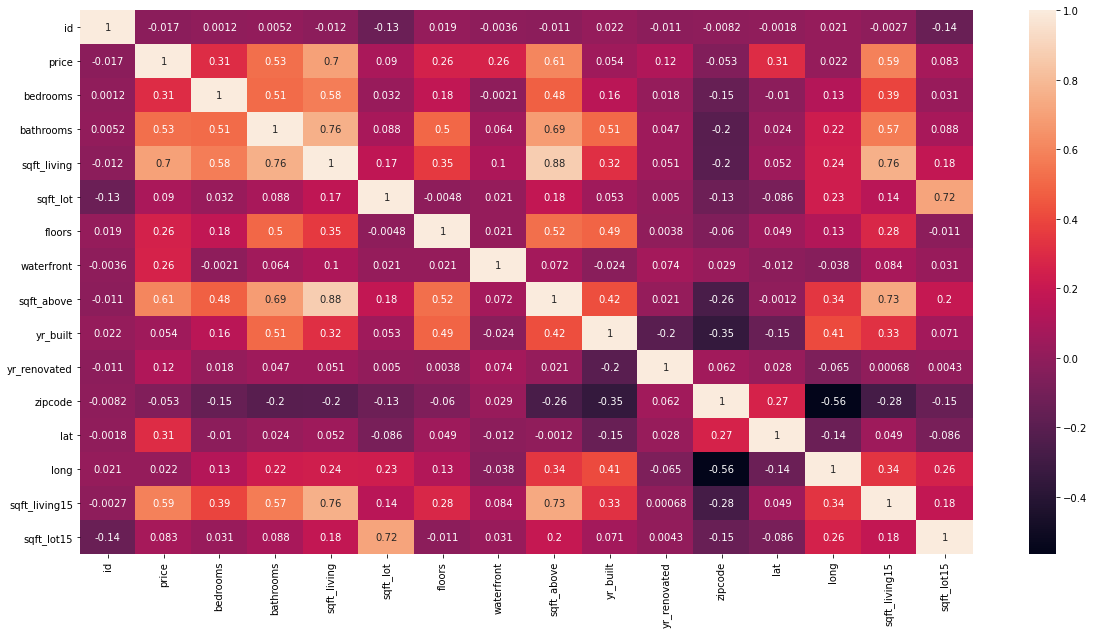

In [132]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), annot=True)

In [133]:
df.replace(("?", '0.0'), inplace=True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [134]:
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [120]:
df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [135]:
# view = OneHotEncoder(sparse=False, handle_unknown='ignore')
# x2 = df[['view']]
# view.fit(x2)
# view.transform(x2)
# view_array = view.transform(x2)
# view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'), index=df.index)
# df = pd.concat([df, view_panda], axis=1)
# df

In [136]:
# condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
# X3 = df[['condition']]
# condition.fit(X3)
# condition.transform(X3)
# condition_array = condition.transform(X3)
# condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 
#                                                          'Cond_Fair','Cond_Good','Cond_Poor','Cond_VeryGood'), index=df.index)
# df = pd.concat([df, condition_panda], axis=1)


In [137]:
# grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
# x4 = df[['grade']]
# grade.fit(x4)
# grade_array = grade.transform(x4)
# grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade','ExcellentGrade','LuxaryGrade','MansionGrade','PoorGrade',
#                                                  'LowGrade','FairGrade','LowAvgGrade','AvgGrade',
#                                                   'GoodGrade','BetterGrade'),index=df.index)
 
# df = pd.concat([df, grade_panda], axis=1)


In [138]:
# df.drop(columns='view', inplace=True)
# df.drop(columns='condition', inplace=True)
# df.drop(columns='grade', inplace=True)

In [139]:
X_new= df.drop(['price'],axis=1)
y_new= df['price']
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, random_state=100)

baseline_model = DummyRegressor(strategy='median')
baseline_model.fit(x_train, y_train)
baseline_model.score(x_test, y_test)

-0.04565389000339315

# STANDARD SCALING

In [145]:
numeric=['sqft_living','long','lat','sqft_lot','zipcode','bedrooms','bathrooms','floors']
categorical=['condition','yr_renovated','yr_built','waterfront','id', 'view', 'grade']

x_train_num= x_train[numeric]
x_train_cat= x_train[categorical]

In [146]:
ss=StandardScaler()
ss.fit(x_train_num)
x_train_num_scaled=ss.transform(x_train_num)
x_pandas_scaled = pd.DataFrame(x_train_num_scaled, columns=numeric, index=x_train_cat.index)
df_scaled = pd.concat((x_train_cat,x_pandas_scaled), axis=1)
df_scaled = pd.concat((df_scaled, y_train), axis=1)

In [147]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 7152 to 5640
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   condition     16197 non-null  object 
 1   yr_renovated  16197 non-null  float64
 2   yr_built      16197 non-null  int64  
 3   waterfront    16197 non-null  int64  
 4   id            16197 non-null  int64  
 5   view          16197 non-null  object 
 6   grade         16197 non-null  object 
 7   sqft_living   16197 non-null  float64
 8   long          16197 non-null  float64
 9   lat           16197 non-null  float64
 10  sqft_lot      16197 non-null  float64
 11  zipcode       16197 non-null  float64
 12  bedrooms      16197 non-null  float64
 13  bathrooms     16197 non-null  float64
 14  floors        16197 non-null  float64
 15  price         16197 non-null  float64
dtypes: float64(10), int64(3), object(3)
memory usage: 2.1+ MB


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

# THIS IS CRAP CODE

In [26]:
## Attempting to find the best features for selection using RFE in SKLearn

#Creating an instance
model = LinearRegression()

selector = RFE(model, n_features_to_select=3)
selector.fit(x_train, y_train)
selector.ranking_

selector = selector.fit(x_train, y_train)

In [27]:
selector_RFECV = RFECV(model, step=1, cv=5)
selector_RFECV.fit(x_train, y_train)
selector_RFECV.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [28]:
df_wo_id = df.drop(columns='id')

In [29]:
x_new_2= df_wo_id.drop(['price'],axis=1)
y_new_2= df_wo_id['price']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_new_2, y_new_2, random_state=100)

In [30]:
linreg = LinearRegression()
linreg.fit(x_train_2, y_train_2)
linreg.score(x_test_2, y_test_2)

0.7311326508962956

In [31]:
error = linreg.predict(x_test_2)-y_test_2
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

## RMSE IS 202,401 WHICH IS DOWN FROM 293K WHERE WE STARTED.

40966461501.9555
202401.73295195744


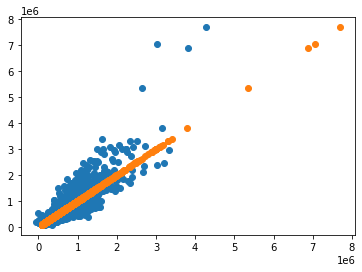

In [32]:
ypred2 = linreg.predict(x_test_2)
plt.scatter(ypred2,y_test_2)
plt.scatter(y_test_2,y_test_2);

In [33]:
df_coll_linn = df_wo_id.drop(['Cond_Fair', 'sqft_living', 'month_sold'], axis=1)
df_coll_linn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_lot        21597 non-null  int64  
 4   floors          21597 non-null  float64
 5   waterfront      21597 non-null  int64  
 6   sqft_above      21597 non-null  int64  
 7   sqft_basement   21597 non-null  float64
 8   yr_built        21597 non-null  int64  
 9   yr_renovated    21597 non-null  float64
 10  zipcode         21597 non-null  int64  
 11  lat             21597 non-null  float64
 12  long            21597 non-null  float64
 13  sqft_living15   21597 non-null  int64  
 14  sqft_lot15      21597 non-null  int64  
 15  day_sold        21597 non-null  int64  
 16  year_sold       21597 non-null  int64  
 17  View_Average    21597 non-null 

In [34]:
x_new_3= df_coll_linn.drop(['price'],axis=1)
y_new_3= df_coll_linn['price']

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_new_3, y_new_3, random_state=100)

In [35]:
linreg.fit(x_train_3, y_train_3)
linreg.score(x_test_3, y_test_3)

0.7202658524197721

In [36]:
linreg.score(x_train_3, y_train_3)

0.7197155206366328

In [37]:
error = linreg.predict(x_test_3)-y_test_3
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

42622200969.47375
206451.4494244924


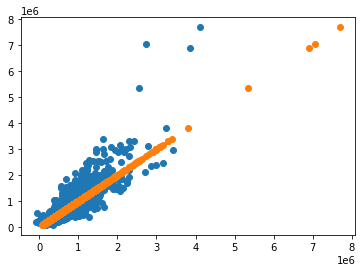

In [38]:
ypred3 = linreg.predict(x_test_3)
plt.scatter(ypred3,y_test_3)
plt.scatter(y_test_3,y_test_3);

In [39]:
df_coll_linn_sqftliv = df_wo_id.drop(['Cond_Good', 'sqft_living15', 'month_sold', 'sqft_above','bathrooms'], axis=1)

In [40]:
x_new_4= df_coll_linn_sqftliv.drop(['price'],axis=1)
y_new_4= df_coll_linn_sqftliv['price']

x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_new_4, y_new_4, random_state=100)

In [41]:
linreg.fit(x_train_4, y_train_4)
linreg.score(x_test_4, y_test_4)

0.7294472368043496

In [42]:
linreg.score(x_train_4, y_train_4)

0.7277271450042806

In [43]:
error = linreg.predict(x_test_4)-y_test_4
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

41223262678.23343
203035.1267102159


In [44]:
#linear analysis: #bathrooms, livingroom sqrt, 
    
linreg.fit(x_train_4, np.log(y_train_4))
linreg.score(x_test_4, np.log(y_test_4))


0.7724653719222305

In [45]:
linreg.score(x_train_4, (np.log(y_train_4)))

0.7666156457406923

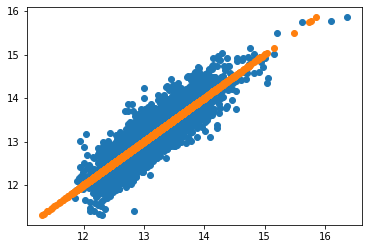

In [46]:
ypred4 = linreg.predict(x_test_4)
plt.scatter(ypred4,np.log(y_test_4))
plt.scatter(np.log(y_test_4),np.log(y_test_4));

In [47]:
# This was a test using the only two features that were linearly regressed.
# We took these features from Mendy's Pairplot.

x_new_5= df[['sqft_living', 'bathrooms' ]]
y_new_5= df_coll_linn['price']

x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_new_5, y_new_5, random_state=100)

linreg.fit(x_train_5, y_train_5)
linreg.score(x_test_5, y_test_5)

# As we can see, this is a crap score.
# Let's check RMSE.


0.4874029817757076

In [48]:
linreg.fit(x_train_5, np.log(y_train_5))
linreg.score(x_test_5, np.log(y_test_5))

#LOG(Y) doesn't seem to change the R^2 value here.

0.48062396632763815

In [49]:
error = linreg.predict(x_test_5)-y_test_5
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

# Worse RMSE than some of our other models. 

439545152328.8761
662982.0150870429


In [50]:
(df['sqft_living'] / df['sqft_lot']).mean()

0.32375545559503777

In [51]:
sqft_living_upper = df['sqft_living'].mean() + (2*df['sqft_living'].std())
sqft_median = df['sqft_living'].median()
sqft_living_upper

3916.5341004171414

In [52]:
df['sqft_living'].max()

13540

In [53]:
df_mean_sqft = df_coll_linn_sqftliv[df_coll_linn_sqftliv['sqft_living'] < 2550]
df_mean_sqft


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,...,ExcellentGrade,LuxaryGrade,MansionGrade,PoorGrade,LowGrade,FairGrade,LowAvgGrade,AvgGrade,GoodGrade,BetterGrade
0,221900.0,3,1180,5650,1.0,0,0.0,1955,0.0,98178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,180000.0,2,770,10000,1.0,0,400.0,1933,0.0,98028,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,604000.0,4,1960,5000,1.0,0,910.0,1965,0.0,98136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,510000.0,3,1680,8080,1.0,0,910.0,1987,0.0,98074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,257500.0,3,1715,6819,2.0,0,1530.0,1995,0.0,98003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,1530,1131,3.0,0,130.0,2009,0.0,98103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,400000.0,4,2310,5813,2.0,0,130.0,2014,0.0,98146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,402101.0,2,1020,1350,2.0,0,130.0,2009,0.0,98144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,400000.0,3,1600,2388,2.0,0,130.0,2004,0.0,98027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
x_new_6= df_mean_sqft.drop(['price'],axis=1)
y_new_6= df_mean_sqft['price']

x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(x_new_6, y_new_6, random_state=100)

linreg.fit(x_train_6, (y_train_6))
linreg.score(x_test_6, (y_test_6))

0.6275928543495218

In [55]:
linreg.score(x_train_6,(y_train_6))

0.6003327522044333

In [56]:
error = linreg.predict(x_test_6)-y_test_6
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)



12748467068.868067
112909.10976917703


In [57]:
x_new_6= df_mean_sqft.drop(['price'],axis=1)
y_new_6= df_mean_sqft['price']

x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(x_new_6, y_new_6, random_state=100)

linreg.fit(x_train_6, (y_train_6))
linreg.score(x_test_6, (y_test_6))

0.6275928543495218

### CREATING A SPLIT SO THAT I CAN CREATE A SIMPLE MODEL.

Will use the highest correlated methods with price to create a simple model. This looks like price vs. sqft_living.

In [58]:
formula = 'price ~ sqft_living'
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:56:53   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
x_new_simple= df[['sqft_living']]
y_new_simple= df['price']

x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_new_simple, y_new_simple, random_state=100)

linreg.fit(x_train_simple, y_train_simple)
linreg.score(x_test_simple, y_test_simple)

0.48733518973535617

In [60]:
linreg.score(x_train_simple, y_train_simple)

0.4945445156766466

In [61]:
error = linreg.predict(x_test_simple)-y_test_simple
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

78113104038.57623
279487.2162346182


### END SPLIT HERE

### Creating a histogram of months sold to see if there is any uptick in housing months


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  day_sold        21597 non-null 

(array([2225., 1875., 2229., 2414., 2178., 2211., 1939., 1771., 1876.,
        2879.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

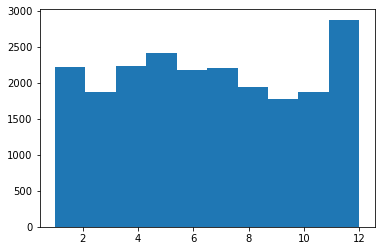

In [63]:
fig, ax = plt.subplots()

x = df['month_sold']
ax.hist(x)

### STANDARD SCALING

In [64]:
numeric=['sqft_living','long','lat','sqft_lot','zipcode','bedrooms','bathrooms','floors']
categorical=['year_sold','month_sold','day_sold','BetterGrade','GoodGrade','AvgGrade','LowAvgGrade','FairGrade',
            'LowGrade','PoorGrade','MansionGrade','LuxaryGrade','ExcellentGrade','VeryGoodGrade','Cond_VeryGood',
            'Cond_Poor','Cond_Good','Cond_Fair','Cond_Average','View_None','View_Good','View_Fair','View_Excellent',
            'View_Average','yr_renovated','yr_built','waterfront','id']

x_train_num= x_train[numeric]
x_train_cat= x_train[categorical]

In [65]:
ss=StandardScaler()
ss.fit(x_train_num)

StandardScaler()

In [66]:
ss=StandardScaler()
ss.fit(x_train_num)
x_train_num_scaled=ss.transform(x_train_num)

In [67]:
ss=StandardScaler()
ss.fit(x_train_num)
x_train_num_scaled=ss.transform(x_train_num)
x_pandas_scaled = pd.DataFrame(x_train_num_scaled, columns=numeric, index=x_train_cat.index)

In [68]:
x_pandas_scaled

,sqft_living,long,lat,sqft_lot,zipcode,bedrooms,bathrooms,floors
7152,-0.560951,0.767978,0.863679,-0.180473,-0.486631,0.677781,-0.479368,-0.916579
8823,0.017718,0.292357,1.180919,-0.062092,-0.823387,0.677781,-0.154732,-0.916579
11039,-0.822990,-0.403328,-0.873177,-0.062140,2.057749,-0.399975,-0.479368,-0.916579
17557,-0.331667,-0.360735,-2.097957,1.567163,-1.440774,-1.477730,-1.453276,-0.916579
16607,-0.113301,2.926019,-0.545072,-0.131049,-0.617592,-0.399975,0.494540,0.935215
...,...,...,...,...,...,...,...,...
16304,-0.266157,-0.431723,-1.739432,0.034590,-1.440774,-0.399975,-0.479368,-0.916579
79,1.491686,1.342982,-1.585157,0.582526,-1.272395,0.677781,0.494540,0.935215
12119,-0.473605,-0.807960,-1.682937,-0.126023,-1.403356,-0.399975,-0.804004,-0.916579
14147,-0.200648,-0.992530,-1.707563,0.066055,-1.029183,-0.399975,0.169904,-0.916579


In [69]:
x_train_cat.index

Int64Index([ 7152,  8823, 11039, 17557, 16607,  9930,  8488, 13660, 20123,
             7344,
            ...
            13890, 20533, 10082, 14260, 16734, 16304,    79, 12119, 14147,
             5640],
           dtype='int64', length=16197)

In [70]:
ss=StandardScaler()
ss.fit(x_train_num)
x_train_num_scaled=ss.transform(x_train_num)
x_pandas_scaled = pd.DataFrame(x_train_num_scaled, columns=numeric, index=x_train_cat.index)
x_pandas_scaled = pd.DataFrame(x_train_num_scaled, columns=numeric, index=x_train_cat.index)
df_scaled = pd.concat((x_train_cat,x_pandas_scaled), axis=1)
df_scaled = pd.concat((df_scaled, y_train), axis=1)

In [71]:
df_scaled.shape

(16197, 37)

In [72]:
y_train.shape

(16197,)

### NOW WE ARE GOING TO CREATE AN OLS ON THE SCALED DATA.

In [73]:
df_scaled.shape

(16197, 37)

In [74]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  day_sold        21597 non-null 

In [75]:
formula = 'price ~ sqft_living + bedrooms + bathrooms'
model = ols(formula=formula, data=df_scaled).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5565.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:56:53   Log-Likelihood:            -2.2444e+05
No. Observations:               16197   AIC:                         4.489e+05
Df Residuals:                   16193   BIC:                         4.489e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.418e+05   1981.537    273.405      0.000    5.38e+05    5.46e+05
sqft_living  2.754e+05   3201.457     86.036      0.000    2.69e+05    2.82e+05
bedrooms    -5.067e+04   2441.057    -20.758      0.000   -5.55e+04   -4.59e+04
bathrooms    8264.8439   3053.814      2.706      0.007    2279.030    1.43e+04
==============================================================================
Omnibus:                     9473.703   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189947.736
Skew:                           2.420   Prob(JB):                         0.00
Kurtosis:                      19.064   Cond. No.                         3.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([6.237e+03, 7.663e+03, 1.918e+03, 3.040e+02, 5.200e+01, 1.900e+01,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.8711446 , -0.43320706,  1.00473047,  2.44266801,  3.88060555,
         5.31854308,  6.75648062,  8.19441815,  9.63235569, 11.07029322,
        12.50823076]),
 <BarContainer object of 10 artists>)

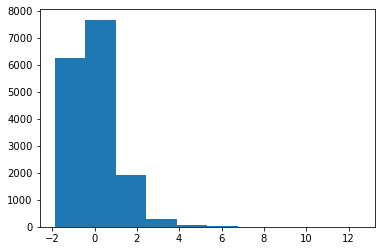

In [76]:
plt.hist(df_scaled['sqft_living'])

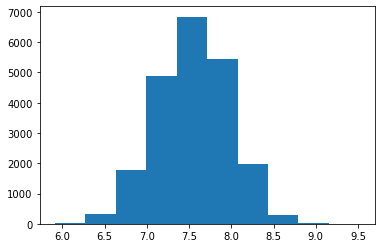

In [77]:
xxxx = np.log(df['sqft_living'])
plt.hist(xxxx);

(array([1.478e+04, 1.398e+03, 1.700e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-2.55548618,  0.89333222,  4.34215062,  7.79096902, 11.23978742,
        14.68860582, 18.13742422, 21.58624262, 25.03506102, 28.48387942,
        31.93269782]),
 <BarContainer object of 10 artists>)

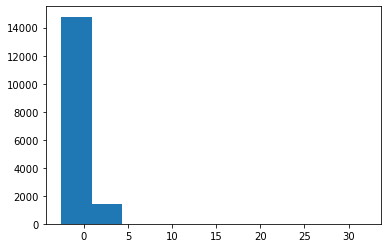

In [78]:
plt.hist(df_scaled['bedrooms'])

(array([2.918e+03, 4.822e+03, 5.576e+03, 1.912e+03, 7.670e+02, 1.490e+02,
        3.600e+01, 1.100e+01, 4.000e+00, 2.000e+00]),
 array([-2.10254803, -1.12863989, -0.15473176,  0.81917638,  1.79308452,
         2.76699265,  3.74090079,  4.71480892,  5.68871706,  6.6626252 ,
         7.63653333]),
 <BarContainer object of 10 artists>)

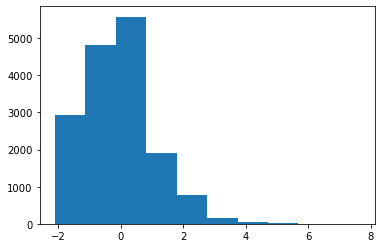

In [79]:
plt.hist(df_scaled['bathrooms'])

In [80]:
yyyy = np.log(df_scaled['bathrooms'])
zzzz = np.log(df_scaled['bedrooms'])

/Users/adamlarsen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([2.925e+03, 4.815e+03, 6.469e+03, 1.557e+03, 2.290e+02, 1.650e+02,
        2.000e+01, 1.300e+01, 2.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

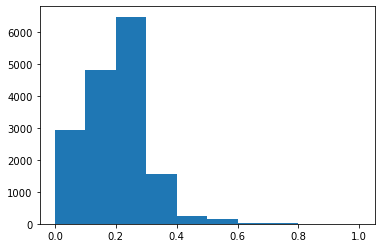

In [81]:
bas = df_scaled['bathrooms']
bes = df_scaled['bedrooms']

scaled_bathrooms = (bas - min(bas)) / (max(bas) - min(bas))
scaled_bedrooms = (bes - min(bes)) / ((max(bes)) - min(bes))

plt.hist(scaled_bathrooms)

# This looks way better for bathrooms, almost more normally distributed.

(array([1.478e+04, 1.398e+03, 1.700e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

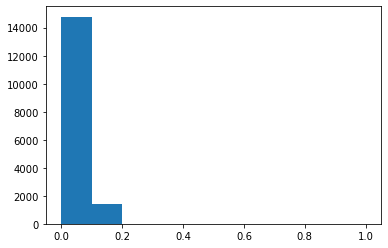

In [82]:
plt.hist(scaled_bedrooms)

/Users/adamlarsen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adamlarsen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([5.171e+03, 0.000e+00, 1.176e+03, 1.950e+02, 2.700e+01, 1.500e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.05859714,  0.04140286,  0.14140286,  0.24140286,  0.34140286,
         0.44140286,  0.54140286,  0.64140286,  0.74140286,  0.84140286,
         0.94140286]),
 <BarContainer object of 10 artists>)

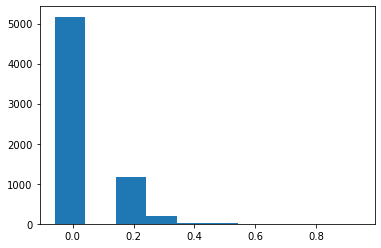

In [83]:
scaled_bedrooms2 = (zzzz - np.mean(zzzz)) / (max(zzzz) - min(zzzz))
plt.hist(scaled_bedrooms2)

# scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

(array([5.171e+03, 0.000e+00, 1.176e+03, 1.950e+02, 2.700e+01, 1.500e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.38893094, -0.0036748 ,  0.38158135,  0.76683749,  1.15209363,
         1.53734978,  1.92260592,  2.30786206,  2.69311821,  3.07837435,
         3.46363049]),
 <BarContainer object of 10 artists>)

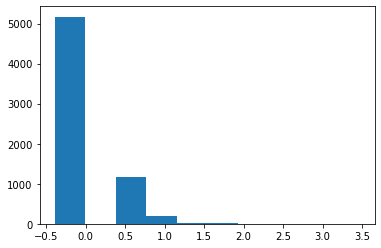

In [84]:
plt.hist(zzzz) #bedrooms

,year_sold,month_sold,day_sold,BetterGrade,GoodGrade,AvgGrade,LowAvgGrade,FairGrade,LowGrade,PoorGrade,...,id,sqft_living,long,lat,sqft_lot,zipcode,bedrooms,bathrooms,floors,price
7152,2015,2,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7201600190,-0.560951,0.767978,0.863679,-0.180473,-0.486631,0.677781,-0.479368,-0.916579,430000.0
8823,2014,8,27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2558600100,0.017718,0.292357,1.180919,-0.062092,-0.823387,0.677781,-0.154732,-0.916579,500000.0
11039,2015,4,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8849300320,-0.822990,-0.403328,-0.873177,-0.062140,2.057749,-0.399975,-0.479368,-0.916579,265000.0
17557,2014,6,26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3751606514,-0.331667,-0.360735,-2.097957,1.567163,-1.440774,-1.477730,-1.453276,-0.916579,270000.0
16607,2015,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2607720440,-0.113301,2.926019,-0.545072,-0.131049,-0.617592,-0.399975,0.494540,0.935215,470000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,2014,8,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8001450170,-0.266157,-0.431723,-1.739432,0.034590,-1.440774,-0.399975,-0.479368,-0.916579,274950.0
79,2015,3,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1531000030,1.491686,1.342982,-1.585157,0.582526,-1.272395,0.677781,0.494540,0.935215,720000.0
12119,2014,5,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1042500013,-0.473605,-0.807960,-1.682937,-0.126023,-1.403356,-0.399975,-0.804004,-0.916579,219950.0
14147,2015,1,14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5153200666,-0.200648,-0.992530,-1.707563,0.066055,-1.029183,-0.399975,0.169904,-0.916579,212000.0


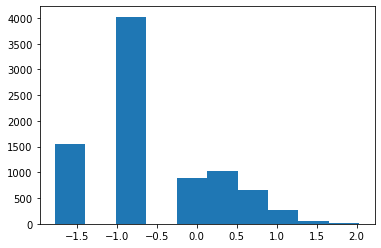

In [85]:
plt.hist(yyyy) #bathrooms
df_scaled

In [86]:
df_scaled.head()
df_scaled['bathrooms_minmax'] = scaled_bathrooms

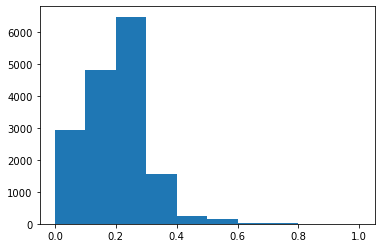

In [87]:
plt.hist(df_scaled['bathrooms_minmax']);
df_scaled['log_sqft'] = xxxx

In [88]:
formula = 'price ~ log_sqft + bathrooms_minmax'
model = ols(formula=formula, data=df_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     5238.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:56:56   Log-Likelihood:            -2.2614e+05
No. Observations:               16197   AIC:                         4.523e+05
Df Residuals:                   16194   BIC:                         4.523e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.874e+06   5.54e+04    -51.923      0.000   -2.98e+06   -2.77e+06
log_sqft          4.386e+05   8016.020     54.715      0.000    4.23e+05    4.54e+05
bathrooms_minmax  4.781e+05    3.3e+04     14.473      0.000    4.13e+05    5.43e+05
==============================================================================
Omnibus:                    11780.009   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           384684.924
Skew:                           3.131   Prob(JB):                         0.00
Kurtosis:                      26.039   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/adamlarsen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adamlarsen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


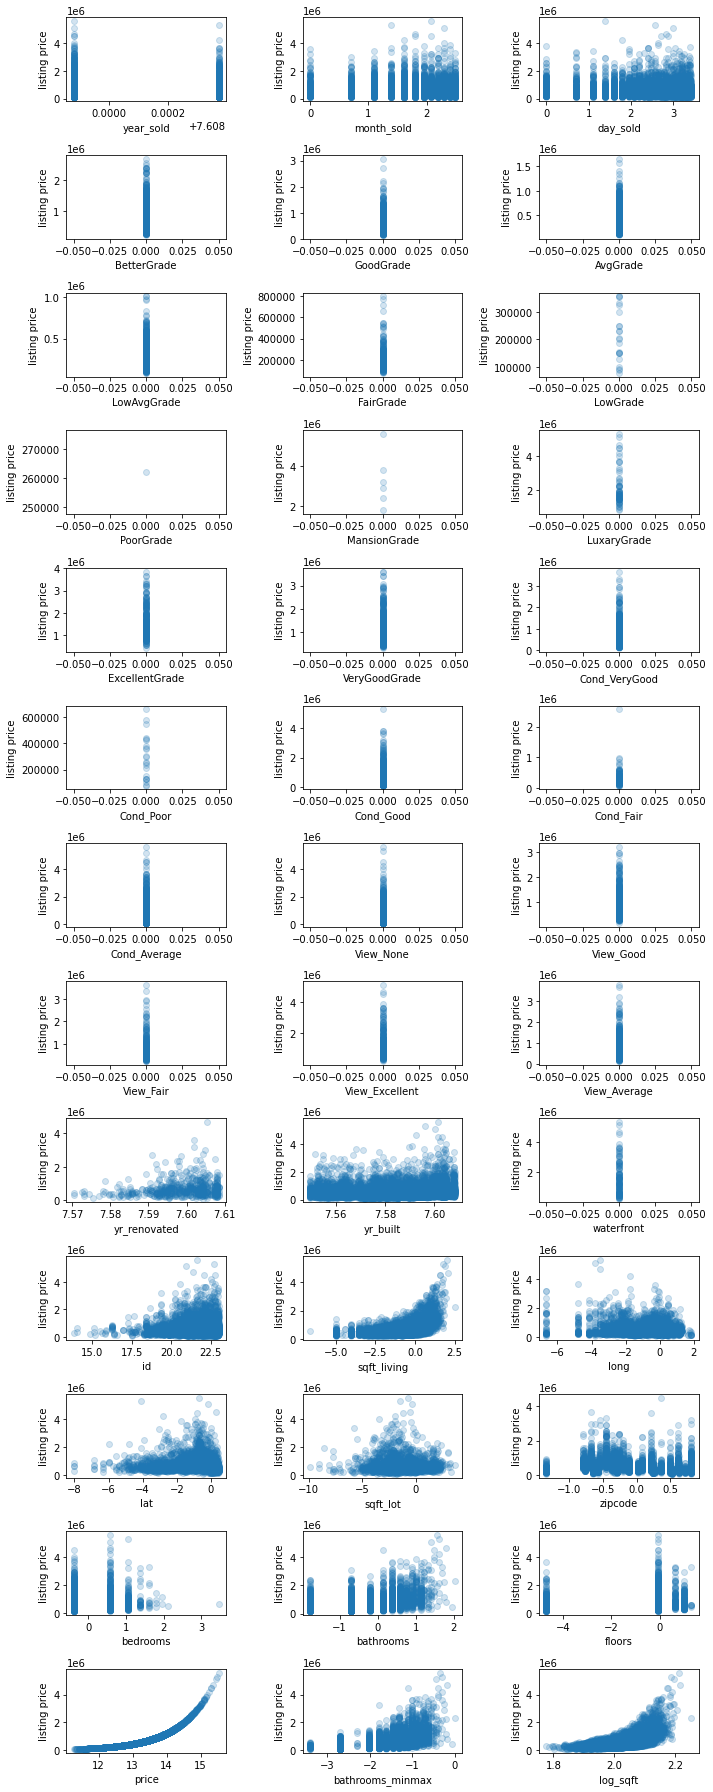

In [89]:
X = df.drop('price', axis=1)

fig, axes = plt.subplots(ncols=3, nrows=13, figsize=(10, 25))
fig.set_tight_layout(True)

for index, col in enumerate(df_scaled.columns):
    ax = axes[index//3][index%3]
    ax.scatter(np.log(df_scaled[col]), (y_train), alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [90]:
meanie = df_scaled['log_sqft'].quantile(.25)
df_scaled_2 = df_scaled[df_scaled['log_sqft'] < meanie]

In [91]:
formula = 'price ~ log_sqft + bathrooms_minmax'
model = ols(formula=formula, data=df_scaled_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.46e-53
Time:                        15:57:01   Log-Likelihood:                -53090.
No. Observations:                4025   AIC:                         1.062e+05
Df Residuals:                    4022   BIC:                         1.062e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.673e+05   7.74e+04     -7.327      0.000   -7.19e+05   -4.15e+05
log_sqft          1.267e+05   1.13e+04     11.231      0.000    1.05e+05    1.49e+05
bathrooms_minmax  1.654e+05   3.36e+04      4.921      0.000    9.95e+04    2.31e+05
==============================================================================
Omnibus:                      493.018   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.292
Skew:                           0.902   Prob(JB):                    4.33e-159
Kurtosis:                       4.047   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
x_new_simple_2= df_scaled_2[['sqft_living', 'bathrooms_minmax']]
y_new_simple_2= (df_scaled_2['price'])

x_train_simple_2, x_test_simple_2, y_train_simple_2, y_test_simple_2 = train_test_split(x_new_simple_2, y_new_simple_2, random_state=100)

linreg.fit(x_train_simple_2, y_train_simple_2)
linreg.score(x_test_simple_2, y_test_simple_2)

0.06835994313071814

In [100]:
linreg.score(x_train_simple_2, y_train_simple_2)

0.05373934881664122

In [101]:
error = linreg.predict(x_test_simple_2)-y_test_simple_2
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

15229725593.064392
123408.77437631569


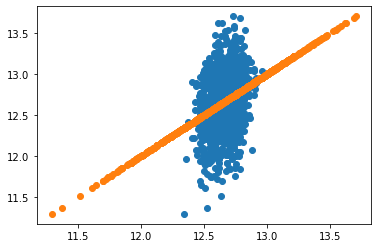

In [96]:
ypred3 = linreg.predict(x_test_simple_2)
plt.scatter(ypred3, y_test_simple_2)
plt.scatter(y_test_simple_2 , y_test_simple_2);

In [97]:


x_new_simple_2= df_scaled[['sqft_living', 'bathrooms_minmax']]
y_new_simple_2= df_scaled['price']

x_train_simple_2, x_test_simple_2, y_train_simple_2, y_test_simple_2 = train_test_split(x_new_simple_2, y_new_simple_2, random_state=100)

linreg.fit(x_train_simple_2, y_train_simple_2)
linreg.score(x_test_simple_2, y_test_simple_2)

0.4878037057576745

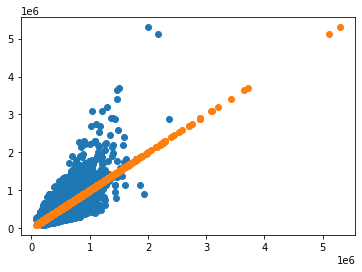

In [98]:
ypred3 = linreg.predict(x_test_simple_2)
plt.scatter(ypred3, y_test_simple_2)
plt.scatter(y_test_simple_2 , y_test_simple_2);